In [489]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
from sklearn.decomposition import PCA
import pandas as pd

# Vectors

## How it Looks

An ordered list of numbers. The dimensionality of a vector is the number of its numbers. If the vector contains 2 vectors, its a 2 dimensional vector. If it contains 500, its a 500 dimensional vector.

<b> v1 </b> = [1, 2, 3]

A vector is a straight line with some length and some direction

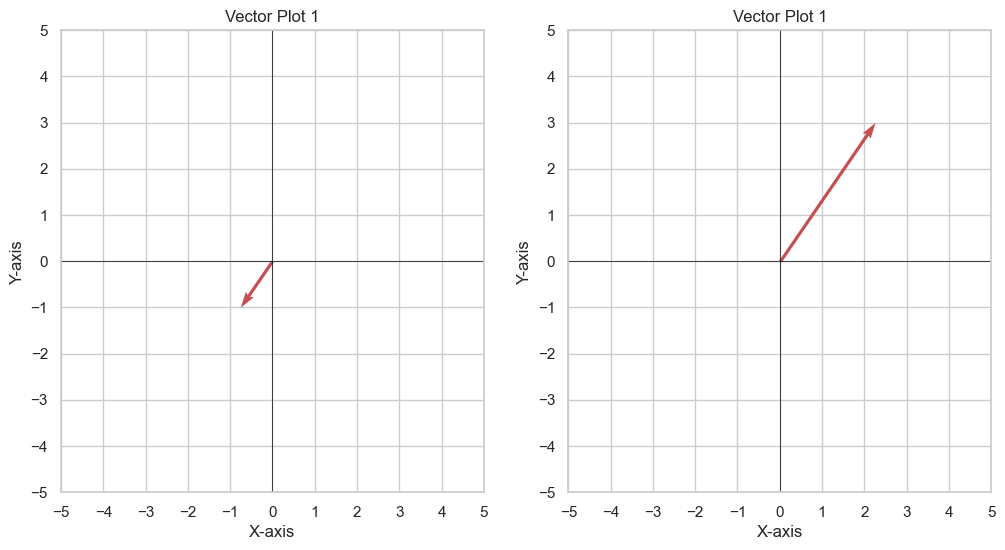

In [426]:
vector = np.array([3, 4])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

origin = np.array([0, 0])

for idx, ax in enumerate((ax1, ax2)):
    ax.set_xticks(np.arange(-5, 6, 1))
    ax.set_yticks(np.arange(-5, 6, 1))
    ax.quiver(*origin, *vector * (idx + -0.25), angles='xy', scale_units='xy', scale=1, color='r')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Vector Plot 1')
    ax.grid(True)

When a vector starts from the origin, its called being in standard position.

3d vector

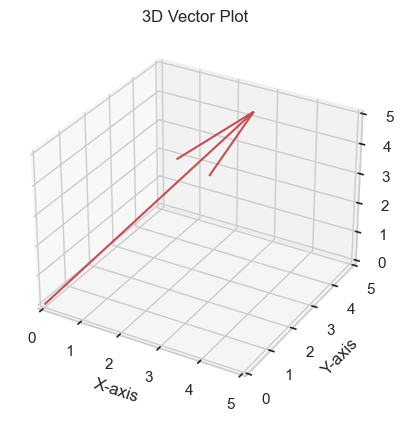

In [427]:
vector = np.array([3, 4, 5])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

origin = np.array([0, 0, 0])

ax.quiver(*origin, *vector, color='r')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Vector Plot')

plt.show()

## Fields & Dimensions

In [428]:
v1 = np.array([1,2,3])
v1

array([1, 2, 3])

In [429]:
type(v1)

numpy.ndarray

In [430]:
v1.shape

(3,)

Vector v's field is real numbers

Its dimensionality is N

$$\mathbf{v} \in \mathbb{R}^N$$

$$ \mathbb{R}^3 $$

## Operations on Vectors

### Calculating Vector Magnitude

$$
\|\mathbf{v}\|_2 = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2} = \sqrt{\sum_{i=1}^{n} v_i^2}
$$

In [431]:
v1

array([1, 2, 3])

In [432]:
v1_norm = math.sqrt((1**2 + 2**2 + 3**2))
v1_norm

3.7416573867739413

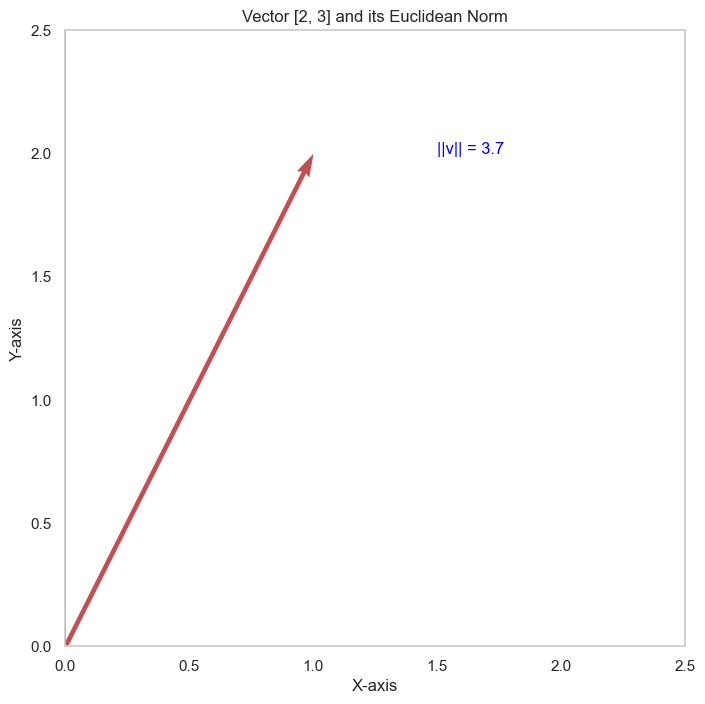

In [433]:
euclidean_norm = np.linalg.norm(v1)

plt.figure(figsize=(8, 8))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.xlim(0, 2.5)
plt.ylim(0, 2.5)
plt.grid()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.text(vector[0] / 2, vector[1] / 2, f'||v|| = {euclidean_norm:.1f}', fontsize=12, color='blue')

plt.title('Vector [2, 3] and its Euclidean Norm')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

### Addition

In order to add 2 vectors, they must be of the same dimensionality

In [266]:
v1 = np.array([1,2])
v2 = np.array([3,4])

v1 + v2

array([4, 6])

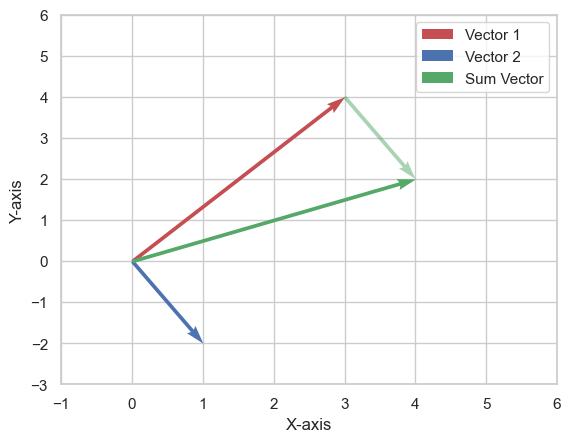

In [277]:
vector1 = np.array([3, 4])
vector2 = np.array([1, -2])

vector_sum = vector1 + vector2

fig, ax = plt.subplots()
origin = np.array([0, 0])

ax.quiver(*origin, *vector1, angles='xy', scale_units='xy', scale=1, color='r', label='Vector 1')
ax.quiver(*origin, *vector2, angles='xy', scale_units='xy', scale=1, color='b', label='Vector 2')
ax.quiver(*origin, *vector_sum, angles='xy', scale_units='xy', scale=1, color='g', label='Sum Vector')
ax.quiver(*vector1, *(vector_sum - vector1), angles='xy', scale_units='xy', scale=1, color='g',
          linestyle='dashed', alpha=0.5)

ax.set_xlim(-1, 6)
ax.set_ylim(-3, 6)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

ax.grid(True)

ax.legend()

ax.set_xticks(np.arange(-1, 7, 1))
ax.set_yticks(np.arange(-3, 7, 1))

plt.show()

### Exercise

1. Write a function that calculates a vector's angle, make sure to return it in degrees.
2. Use the function you wrote to prove that multiplying a vector by a scalar doesn't change its angle, but adding another vector might.

<b> Hint: </b>

You might want to use Numpy's arctan2 method

### Multiplying a Vector By a Scalar

A scalar is number. Not a vector, just a plain old number. Multiplying a vector by a scalar does not change its direction, only its size.

In [436]:
v1 = np.array([1,2])
v1 * 2

array([2, 4])

In [437]:
scaled_vector

array([-0.5, -1. ])

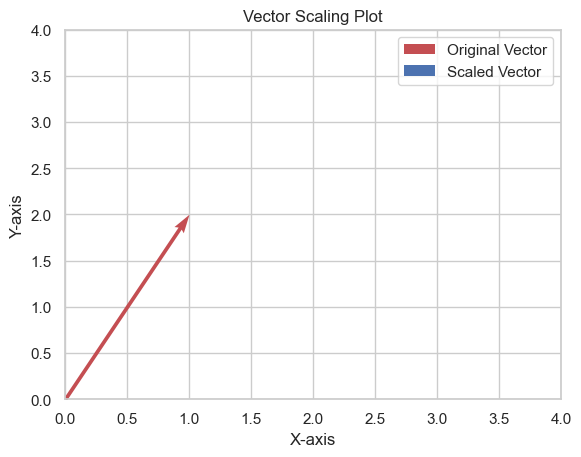

In [438]:
vector = np.array([1, 2])
scalar = -0.5

scaled_vector = scalar * vector

fig, ax = plt.subplots()
origin = np.array([0, 0])

ax.quiver(*origin, *vector, angles='xy', scale_units='xy', scale=1, color='r', label='Original Vector')
ax.quiver(*origin, *scaled_vector, angles='xy', scale_units='xy', scale=1, color='b', label='Scaled Vector')

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Vector Scaling Plot')

ax.grid(True)
ax.legend()
plt.show()

There are a few ways to multiplie 2 vectors, the most common are:

1. Dot product
2. Hadamard 
3. Outer product

### Dot Product/Scalar Product

The dot product is used to represent similarity, projection or interaction between two vectors.
For example, finding the angle between two vectors. The cosine of an angle between two vectors is a measurement of how similar they are (as we will shortly see).

In [439]:
v1 = np.array([1,2])
v2 = np.array([3,4])

dot_product = v1.dot(v2)
dot_product

11

Dot product result is a scalar!

In [440]:
v1 = np.array([1,2]) # 2
v2 = np.array([3,4,3]) # 3

dot_product = v1.dot(v2)

ValueError: shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)

In [441]:
a1_slider = widgets.IntSlider(min=-10, max=10, step=1, value=1, description='A1')
a2_slider = widgets.IntSlider(min=-10, max=10, step=1, value=1, description='A2')

b1_slider = widgets.IntSlider(min=-10, max=10, step=1, value=1, description='B1')
b2_slider = widgets.IntSlider(min=-10, max=10, step=1, value=1, description='B2')

def calculate_dot_product(a1, a2, b1, b2):
    vector_a = np.array([a1, a2])
    vector_b = np.array([b1, b2])
    dot_product = np.dot(vector_a, vector_b)
    print(f"Vector A: {vector_a}")
    print(f"Vector B: {vector_b}")
    print(f"Dot Product: {dot_product}")

output = widgets.interactive_output(calculate_dot_product, 
                                    {'a1': a1_slider, 'a2': a2_slider, 
                                     'b1': b1_slider, 'b2': b2_slider})

display(a1_slider, a2_slider, b1_slider, b2_slider, output)


IntSlider(value=1, description='A1', max=10, min=-10)

IntSlider(value=1, description='A2', max=10, min=-10)

IntSlider(value=1, description='B1', max=10, min=-10)

IntSlider(value=1, description='B2', max=10, min=-10)

Output()

#### What is Dot Product Useful For

1. Measuring the angle between two vectors.

In [442]:
car = [1, 20, 41, 290 ,843]
wheel = [1, 12. 2, 4, 5, 6]
gloves = [22, 10, 29, 8, 37, 21]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2417197657.py, line 2)

In [443]:
# GloVE embeddings:

In [444]:
small_glove_embeddings['king'].shape

(10,)

In [ ]:
king = [0.43, .3232, .433, .192, -.04343, ]

In [445]:
small_glove_embeddings = {
    'king': np.array([0.52654, -0.24538, 0.46737, 0.70348, 0.23647, 0.45902, -0.50265, -0.02281, 0.65211, -0.08349]),
    'queen': np.array([0.31703, -0.17573, 0.56205, 0.70857, 0.07399, 0.54469, -0.29225, -0.00839, 0.67575, 0.07804]),
    'man': np.array([0.42751, -0.20688, 0.45803, 0.63649, 0.18779, 0.31568, -0.37995, -0.06743, 0.48653, -0.09921]),
    'woman': np.array([0.25492, -0.15052, 0.52889, 0.67948, 0.04324, 0.44135, -0.21645, -0.05523, 0.56297, 0.03745]),
    'apple': np.array([0.19380, 0.21778, 0.38197, 0.66207, 0.08827, 0.28768, -0.34323, -0.10373, 0.52489, -0.16557]),
    'banana': np.array([0.11680, 0.27282, 0.31370, 0.58726, 0.16211, 0.35647, -0.32118, -0.12783, 0.50146, -0.19622]),
    'cat': np.array([0.24788, -0.04950, 0.31342, 0.63817, 0.03495, 0.21575, -0.28760, -0.08599, 0.46724, -0.18518]),
    'dog': np.array([0.30956, -0.06601, 0.29654, 0.58809, 0.09847, 0.23591, -0.31250, -0.05747, 0.49033, -0.14416]),
}

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    return dot_product / (magnitude1 * magnitude2)

KING = 'king'
QUEEN = 'queen'
BANANA = 'banana'

vector1 = small_glove_embeddings[KING]
vector2 = small_glove_embeddings[QUEEN]
vector_3 = small_glove_embeddings[BANANA]

similarity = cosine_similarity(vector1, vector2)
less_similarity = cosine_similarity(vector1, vector_3)

print(f"Cosine Similarity between '{KING}' and '{QUEEN}': {similarity}")
print(f"Cosine Similarity between '{KING}' and '{BANANA}': {less_similarity}")

Cosine Similarity between 'king' and 'queen': 0.9586061635641476
Cosine Similarity between 'king' and 'banana': 0.8538639120049808


In [446]:
king = small_glove_embeddings['king']
queen = small_glove_embeddings['queen']
man = small_glove_embeddings['man']
woman = small_glove_embeddings['woman']

In [447]:
man

array([ 0.42751, -0.20688,  0.45803,  0.63649,  0.18779,  0.31568,
       -0.37995, -0.06743,  0.48653, -0.09921])

In [448]:
king

array([ 0.52654, -0.24538,  0.46737,  0.70348,  0.23647,  0.45902,
       -0.50265, -0.02281,  0.65211, -0.08349])

In [449]:
woman

array([ 0.25492, -0.15052,  0.52889,  0.67948,  0.04324,  0.44135,
       -0.21645, -0.05523,  0.56297,  0.03745])

In [450]:
king - man + woman

array([ 0.35395, -0.18902,  0.53823,  0.74647,  0.09192,  0.58469,
       -0.33915, -0.01061,  0.72855,  0.05317])

In [453]:
transformed_woman = king - man + woman
small_glove_embeddings['transformed_woman'] = transformed_woman

In [456]:
reduced_vectors

array([[-0.27973881,  0.19047146],
       [-0.27283   , -0.1588032 ],
       [-0.08455275,  0.20223358],
       [-0.12205083, -0.12797994],
       [ 0.31150224, -0.08449487],
       [ 0.39988447, -0.12464155],
       [ 0.20934786,  0.10143539],
       [ 0.15567473,  0.14152119],
       [-0.31723689, -0.13974207]])

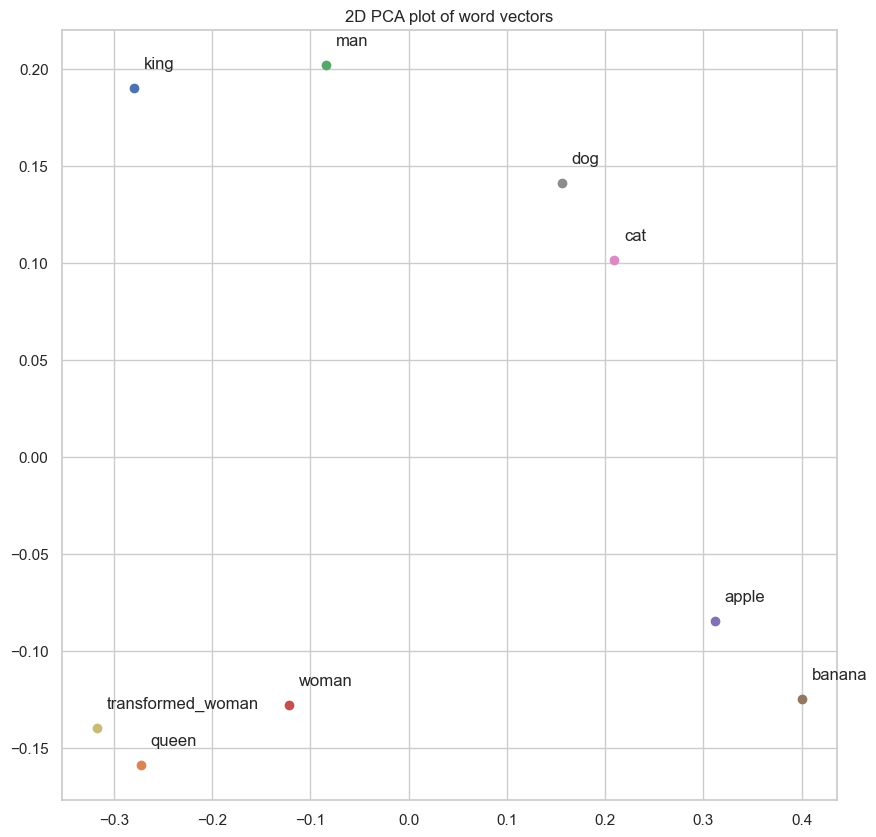

In [454]:
words = list(small_glove_embeddings.keys())
vectors = np.array(list(small_glove_embeddings.values()))

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

plt.figure(figsize=(10, 10))
for word, vector in zip(words, reduced_vectors):
    plt.scatter(vector[0], vector[1])
    plt.text(vector[0] + 0.01, vector[1] + 0.01, word, fontsize=12)

plt.title("2D PCA plot of word vectors")
plt.grid(True)
plt.show()

### Hadamard/Element Wise Product

Used in the attention mechanism and regularizations techniques like dropout.

In [107]:
v3 = [1, 2, 3]
v4 = [3, 4, 5]

np.multiply(v3, v4)

array([ 3,  8, 15])

In [108]:
v3 = [1, 2, 3]
v4 = [3, 4, 5, 2]

np.multiply(v3, v4)

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

### Outer Product

The outer product is used to create a matrix out of two vectors. One use of outer product is to do weights update in the back propagation phase.

In [109]:
v5 = np.array([1,2,3])

In [110]:
v1, v5

(array([1, 2]), array([1, 2, 3]))

In [111]:
np.outer(v1, v5)

array([[1, 2, 3],
       [2, 4, 6]])

### Exercise

Create the 3 matrix multiplication methods on your own.

numpy way of doing things

In [112]:
# dot product 
np.dot(v1,v2)

# Hadamard
v1 * v2

# outer product
np.outer(v1, v2)

ValueError: shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)

##### Solution

In [113]:
def dot_product(vector_a, vector_b):
    if len(vector_a) != len(vector_b):
        raise ValueError("Vectors must have the same length")
    
    dot_product = 0
    for i in range(len(vector_a)):
        dot_product += vector_a[i] * vector_b[i]
    
    return dot_product


In [114]:
v1 = np.array([2,3])
v2 = np.array([4,1])

In [115]:
assert np.dot(v1,v2) == dot_product(v1, v2)

In [116]:
def hadamard_product(vector_a, vector_b):
    
    if len(vector_a) != len(vector_b):
        raise ValueError("Vectors must have the same length")
    
    result = [vector_a[i] * vector_b[i] for i in range(len(vector_a))]
    
    return result

In [117]:
res_1 = v1 * v2
res_2 = hadamard_product(v1, v2)

assert np.array_equal(res_1, res_2)

In [118]:
def outer_product(u, v):
    result = []
    for i in u:
        row = []
        for j in v:
            row.append(i * j)
        result.append(row)
    return result

In [119]:
res_1 = np.outer(v1, v2)
res_2 = outer_product(v1, v2)

assert np.array_equal(res_1, res_2)

### Exercise2

Section 2.1:

Write a function that returns the angle between two 2d vectors.

1. Normalize the two vectors (e.g. divide the vector by its norm).
2. Calculate the dot product between them.
3. Compute the angle using the arccosine function.
4. Convert the angle from radians to degrees.
5. Return the angle.

## Subspace

A vector's subspace is the set of all vectors that can be created by taking a linear combination of a vector or some vectors

In [120]:
v1

array([2, 3])

In [121]:
v1_1 = v1 * 2
v1_1

array([4, 6])

In [122]:
v1_2 = v1 * 4.65
v1_2

array([ 9.3 , 13.95])

### Exercise

Are these vectors in the same subspace as v1?

In [303]:
v1

array([1, 2])

In [304]:
v1_3 = np.array([10, 20])

In [305]:
v1_4 = np.array([4, 10])

In [308]:
v1_5 = np.array([0,5, 1])

A subspace can also be comprised out of a few vectors, for example:

In [307]:
v1_6 = 3 * v1 - 2 * v2
v1_6

array([-3, -2])

v1_6 is a vector that is in the subspace that was defined using vectors v1 and v2

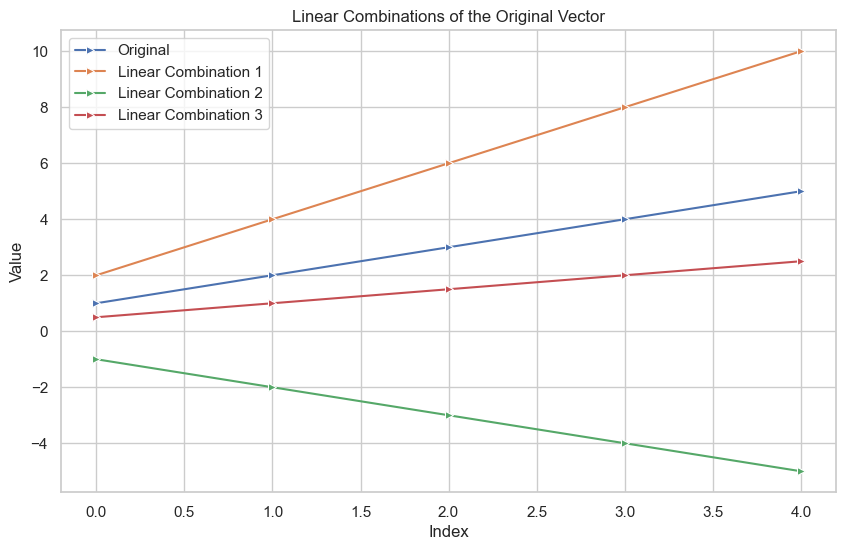

In [127]:
vector = np.array([1, 2, 3, 4, 5])

linear_comb1 = 2 * vector
linear_comb2 = -1 * vector
linear_comb3 = 0.5 * vector

data = pd.DataFrame({
    'Index': np.arange(len(vector)),
    'Original': vector,
    'Linear Combination 1': linear_comb1,
    'Linear Combination 2': linear_comb2,
    'Linear Combination 3': linear_comb3
})

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x='Index', y='Original', data=data, marker='>', label='Original')
sns.lineplot(x='Index', y='Linear Combination 1', data=data, marker='>', label='Linear Combination 1')
sns.lineplot(x='Index', y='Linear Combination 2', data=data, marker='>', label='Linear Combination 2')
sns.lineplot(x='Index', y='Linear Combination 3', data=data, marker='>', label='Linear Combination 3')

plt.title('Linear Combinations of the Original Vector')
plt.ylabel('Value')
plt.legend()
plt.show()

## Independent Vectors

If two vectors are independent of each other, their combination create a plain 

In [128]:
independent_vec_1 = np.array([1,2])
independent_vec_2 = np.array([2,5])

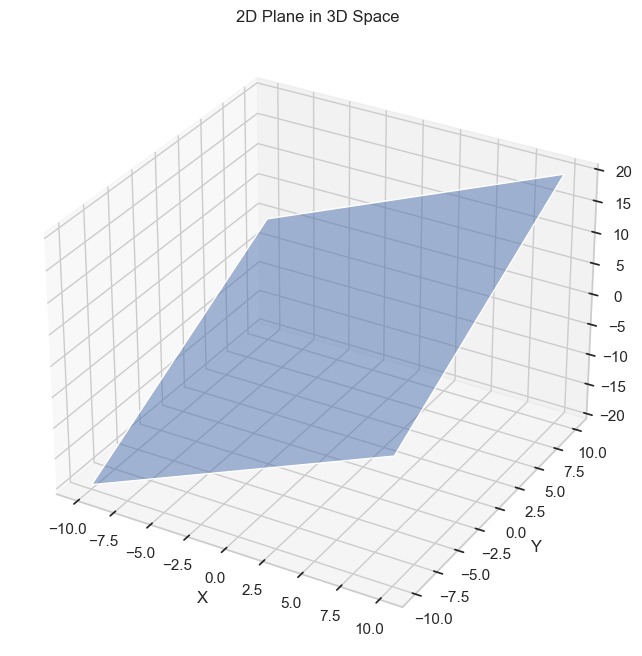

In [309]:
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)
X, Y = np.meshgrid(x, y)

Z = X + Y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('2D Plane in 3D Space')

plt.show()

### Exercise

Write a function that determines whether two vectors are dependent.

#### Solution

In [338]:
def are_vectors_dependent(vec1, vec2):
    for i in range(len(vec1)):
        if vec1[i] != 0:
            vectors_gap_that_should_be_constant = vec2[i] / vec1[i]
            break
    else:
        return True

    return np.all(vec1 * vectors_gap_that_should_be_constant == vec2)

In [339]:
vec1 = np.array([1, 2])
vec2 = np.array([2, 4])
vec3 = np.array([3, 4])

In [340]:
assert are_vectors_dependent(vec1, vec2) == True
assert are_vectors_dependent(vec1, vec3) == False

# Matrices

A Matrix is a multi dimensional vector. Its denoted with a bold capital letter, such as <b> A </b>

A matrix is denoted as rows by columns, e.g. 3x4 means 3 rows and 4 columns

In [133]:
M = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

m1,2 = 2

m2,2 = 6

## Types of Matrices

There are endless types of matrices which are not critical for our business. Therefor I will only show a few so you get the idea

### Square Matrix

Square matrix - a matrix that its rows and columns are the same size. For example 3x3, 5x5, 12X12

In [134]:
M_square = np.array([
    [1, 2, 3],
    [5, 6, 7],
    [9, 10, 11]
])

### Identify Matrix

An identity matrix is a square matrix that has 1 in all its main diagonal and zeros in all other places. 

In [482]:
identity_matrix = np.eye(3)
identity_matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [483]:
M_square

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

In [484]:
M_square * identity_matrix

array([[ 1.,  0.,  0.],
       [ 0.,  6.,  0.],
       [ 0.,  0., 11.]])

### Zero Matrix

Zero matrix is a matrix that has only zeros in all its items.

In [138]:
zero_matrix = np.zeros((3, 3))

In [139]:
zero_matrix

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [140]:
M_square * zero_matrix

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Diagonal Matrix

A diagonal matrix is a matrix that all its elements that are not in the main axis, are 0

In [141]:
diagonal_matrix = np.diag([1, 2, 3])
diagonal_matrix

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

### Exercise

Write a class that identifies 3 kinds of matrices: a zero matrix, a diagonal matrix and an identify matrix. The class input is a matrix and its type is its output.

#### Solution

In [472]:
IDENTITY_MATRIX = 'identity matrix'
ZERO_MATRIX = 'zero_matrix'
DIAGONAL_MATRIX = 'diagonal_matrix'

In [473]:
class MatrixMapper:
    def __init__(self, matrix):
        self.matrix = np.array(matrix)
        self.rows, self.cols = self.matrix.shape

    def is_zero_matrix(self):
        return np.all(self.matrix == 0)

    def is_diagonal_matrix(self):
        if self.rows != self.cols:
            return False
        for i in range(self.rows):
            for j in range(self.cols):
                if i != j and self.matrix[i, j] != 0:
                    return False
        return True

    def is_identity_matrix(self):
        if self.rows != self.cols:
            return False
        identity = np.eye(self.rows)
        return np.array_equal(self.matrix, identity)

    def map_matrix(self):
        if self.is_zero_matrix():
            return ZERO_MATRIX
        elif self.is_identity_matrix():
            return IDENTITY_MATRIX
        elif self.is_diagonal_matrix():
            return DIAGONAL_MATRIX
        else:
            return None

In [478]:
identity_matr = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

zero_matrix = [
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]

diagonal_matrix = [
    [1, 0, 0],
    [0, 2, 0],
    [0, 0, 3]
]

none_matrix = [
    [1, 3, 1],
    [0, 2, 2],
    [5, 0, 3]
]

In [485]:
mapper = MatrixMapper(identity_matr)
assert mapper.map_matrix() == IDENTITY_MATRIX

In [486]:
mapper = MatrixMapper(zero_matrix)
assert mapper.map_matrix() == ZERO_MATRIX

In [487]:
mapper = MatrixMapper(diagonal_matrix)
assert mapper.map_matrix() == DIAGONAL_MATRIX

In [488]:
mapper = MatrixMapper(none_matrix)
assert mapper.map_matrix() == None

In [537]:
class MatrixCalculator:
    def __init__(self, matrix1, matrix2):
        self.matrix1 = np.array(matrix1)
        self.matrix2 = np.array(matrix2)
        
    def calculate_properties(self):
        
        try:
            rows1, cols1 = self.matrix1.shape[0], self.matrix1.shape[1], 
            rows2, cols2 = self.matrix2.shape[0], self.matrix2.shape[1], 

            is_multiplicable = (cols1 == rows2)

            is_scalar = (rows1 == 1 and cols1 == 1) or (rows2 == 1 and cols2 == 1)
            

            result_size = (rows1, cols2) if is_multiplicable else None

            result = {
                'is_multiplicable': is_multiplicable,
                'is_scalar': is_scalar,
                'result_size': result_size
            }

            return result
        
        except ValueError:
            
            print('values mismatch')

Example usage:

In [538]:
matrix1 = [
    [1, 2, 3],
    [4, 5, 6]
]

matrix2 = [
    [3, 3, 3]
]

calculator = MatrixCalculator(matrix1, matrix2)

result = calculator.calculate_properties()

print(result)

{'is_multiplicable': False, 'is_scalar': False, 'result_size': None}


## Matrix Operations

### Matrix Addition & Substraction

In [142]:
m1 = np.array([
    [1,2],
    [4,5]
])
m1

array([[1, 2],
       [4, 5]])

In [143]:
m2 = np.array([
    [3,1],
    [2,-5]
])
m2

array([[ 3,  1],
       [ 2, -5]])

In [144]:
m1+m2

array([[4, 3],
       [6, 0]])

In [145]:
m1 - m2

array([[-2,  1],
       [ 2, 10]])

In [146]:
m_of_different_size = np.array([
    [1,2,3],
    [4,5,3]
])

In [147]:
m1 + m_of_different_size

ValueError: operands could not be broadcast together with shapes (2,2) (2,3) 

### Matrix Scalar Multiplication

In [148]:
m1

array([[1, 2],
       [4, 5]])

In [149]:
3 * m1

array([[ 3,  6],
       [12, 15]])

### Matrix Transpose

In [150]:
M

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [151]:
M.shape

(3, 4)

In [152]:
M.transpose().shape

(4, 3)

In [153]:
M.transpose()

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [154]:
m1

array([[1, 2],
       [4, 5]])

### Broadcasting

In [341]:
m_of_different_size.shape

(2, 3)

In [355]:
rank_three_vector = np.array([1,2,3])

In [356]:
rank_three_vector.shape

(3,)

In [359]:
m_of_different_size

array([[1, 2, 3],
       [4, 5, 3]])

In [357]:
m_of_different_size + rank_three_vector

array([[2, 4, 6],
       [5, 7, 6]])

In [358]:
m1 + m_of_different_size

ValueError: operands could not be broadcast together with shapes (2,2) (2,3) 

## Matrix Multiplication

Matrix multiplication animation: https://matrixmultiplication.xyz/

The most important rule of matrix multiplication: the numbers of columns in the left matrix must match the number of rows in the right matrix. If the condition is met the multiplication can be done and the result will be the number of rows of the left matrix vs the number of column of the right matrix.

3 X 2 @ 2 X 4 --- ?

3 X 4 @ 3 X 4 --- ?

3 X 5 @ 5 X 4 --- ?

7 X 11 @ 11 X 4 --- ?

(3 X 4 ).transpose() @ 4 X 3 --- ?

In [199]:
def gen_matrix(sizes: tuple) -> np.array:
    
    matrix = np.arange(1, np.prod(sizes) +1).reshape(sizes)
    
    return matrix

In [161]:
def multiplie_matrices(matrix_a_size: tuple, matrix_b_size: tuple):
    
    try:
    
        m_a = gen_matrix(matrix_a_size)
        m_b = gen_matrix(matrix_b_size)    

        return m_a @ m_b
    
    except ValueError as e:
        print('something went wrong')
        print(e)

In [162]:
multiplie_matrices((3,2), (2,4)).shape

(3, 4)

In [163]:
multiplie_matrices((3,4), (3,4)).shape

something went wrong
matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)


AttributeError: 'NoneType' object has no attribute 'shape'

In [164]:
multiplie_matrices((3,5), (5,4)).shape

(3, 4)

In [165]:
multiplie_matrices((7,11), (11,4)).shape

(7, 4)

In [166]:
three_by_four_matr @ three_by_four_matr

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

In [167]:
three_by_four_matr @ three_by_four_matr.transpose()

array([[ 30,  70, 110],
       [ 70, 174, 278],
       [110, 278, 446]])

In [168]:
three_by_four_matr @ four_by_three_matr

array([[ 70,  80,  90],
       [158, 184, 210],
       [246, 288, 330]])

In [169]:
four_by_three_matr @ three_by_four_matr

array([[ 38,  44,  50,  56],
       [ 83,  98, 113, 128],
       [128, 152, 176, 200],
       [173, 206, 239, 272]])

Note the two results are <b> not </b> the same

### Exercise

Build a function that does matrix multiplcation

#### Solution

In [170]:
def matrix_multiplication(A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])

    if cols_A != rows_B:
        raise ValueError("Matrices cannot be multiplied")
        
    empty_list = 

    res_matr = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                res_matr[i][j] += A[i][k] * B[k][j]

    return res_matr

SyntaxError: invalid syntax (1857182152.py, line 10)

In [171]:
res1 = four_by_three_matr @ three_by_four_matr
res2 = matrix_multiplication(four_by_three_matr, three_by_four_matr)
assert np.array_equal(res1, res2)

## Matrix-Vector Multiplication

The result of a matrix-vector multiplication is a vector.

M @ v creates a weighted combination of the columns of M

In [172]:
rank_four_vector = np.array([1,1,1,1])

In [173]:
three_by_four_matr @ rank_four_vector

array([10, 26, 42])

In [174]:
three_by_four_matr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

v @ M creates a weighted combination of the rows of M

In [175]:
rank_four_vector.transpose() @ four_by_three_matr

array([22, 26, 30])

In [176]:
three_by_four_matr.shape

(3, 4)

## Matrices properties

### Matrix Span

The span of a matrix are all the matrices that can be reached through a linear combination of its vectors.

In [280]:
linearly_dependent_matrix = np.array([[1,2], [2, 4]])

In [281]:
A1 = gen_matrix((2,3))

In [282]:
A1

array([[1, 2, 3],
       [4, 5, 6]])

In [283]:
np.linalg.matrix_rank(linearly_dependent_matrix)

1

In [284]:
np.linalg.matrix_rank(A1)

2

### Matrix Rank

The rank of a matrix is the number of linearly independent rows or columns in the matrix. It can be computed for any matrix, not only a square matrix. Its important for things like PCA

### Matrix determinant

A scalar that describes a matrix. Only a square matrix has a determinant

The determinant is 0 if all columns/rows are linearly dependent

If the determinant is 0, it means the matrix is completely dependent, a.k.a singular matrix.

In [251]:
A = np.array([[3, 1],
              [2, 4]])

det_A = np.linalg.det(A)

print("Determinant of A:", det_A)

Determinant of A: 10.000000000000002


In [252]:
A1 = np.array([[1,2], [2,4]])

det_A1 = np.linalg.det(A1)

print("Determinant of A1:", det_A1)

Determinant of A1: 0.0


In [253]:
B = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

det_B = np.linalg.det(B)

print("Determinant of B:", det_B)

Determinant of B: -9.51619735392994e-16


In [254]:
C = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])

det_C = np.linalg.det(C)

print("Determinant of C:", det_C)

Determinant of C: -1.439243268894363e-30


### Matrices Last Exercise

Write a class that receives 2 matrices/vectors and returns the following dictionary:

1. is_multiplicable: bool,
2. is_scalar: bool,
3. result_size: (int, int)

Example usage

In [541]:
matrix1 = [
    [1, 2, 3],
    [4, 5, 6]
]

matrix2 = [
    [3, 3, 3]
]

calculator = MatrixCalculator(matrix1, matrix2)

result = calculator.calculate_properties()

print(result)

{'is_multiplicable': False, 'is_scalar': False, 'result_size': None}


{'is_multiplicable': False, 'is_scalar': False, 'result_size': None}

#### Solution

In [ ]:
class MatrixCalculator:
    def __init__(self, matrix1, matrix2):
        self.matrix1 = np.array(matrix1)
        self.matrix2 = np.array(matrix2)
        
    def calculate_properties(self):
        
        try:
            rows1, cols1 = self.matrix1.shape[0], self.matrix1.shape[1], 
            rows2, cols2 = self.matrix2.shape[0], self.matrix2.shape[1], 

            is_multiplicable = (cols1 == rows2)

            is_scalar = (rows1 == 1 and cols1 == 1) or (rows2 == 1 and cols2 == 1)
            

            result_size = (rows1, cols2) if is_multiplicable else None

            result = {
                'is_multiplicable': is_multiplicable,
                'is_scalar': is_scalar,
                'result_size': result_size
            }

            return result
        
        except ValueError:
            
            print('values mismatch')

# Eigenvalues & Eigenvectors

If we multiple a matrix by a vector we get a vector.

In [286]:
three_by_four_matr @ np.array([1, 2, 3, 4])

array([ 30,  70, 110])

The purpose of eigendecomposition is to extract two kinds of features from a square matrix. Eigen values (scalar) and eigen vectors (vectors)

For a matrix of size n x n, there are n eigen values and n eigen vectors. Each eigen value has its own eigen vector.

Eigenvector: A non-zero vector 
𝑣
that, when multiplied by a matrix 
𝐴
results in a scalar multiple of itself: 
𝐴
𝑣
=
𝜆
𝑣


Eigenvalue: The scalar 
λ associated with the eigenvector 
𝑣

Only a square matrix has eigen values and vectors

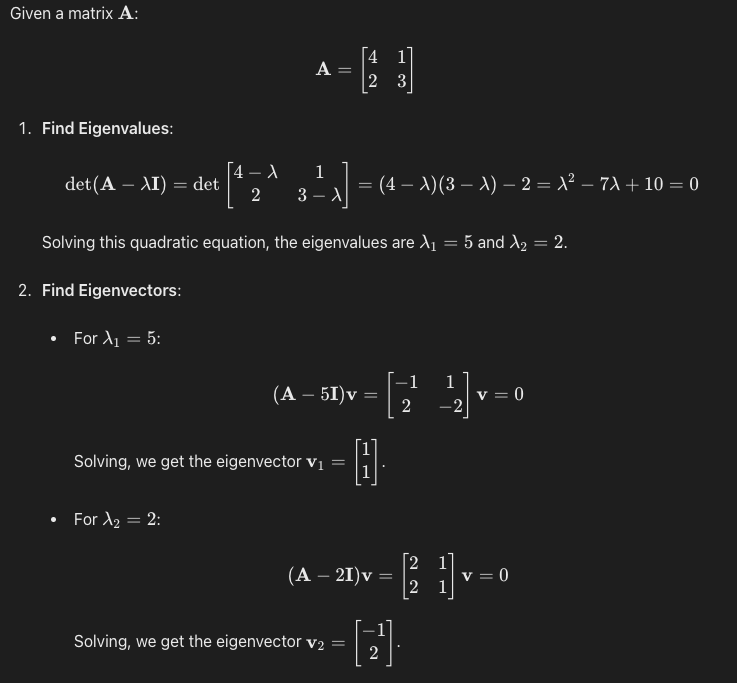

In [288]:
A = np.array([[4, 1],
              [2, 3]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [5. 2.]
Eigenvectors:
 [[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


Note: The calculation returned is column vector, not row vector.

In [289]:
v = np.array([0.70710678, 0.70710678])

lambda_val = 5

Av = A @ v

lambda_v = lambda_val * v

print("A @ v:\n", Av)
print("lambda * v:\n", lambda_v)

print("Are A @ v and lambda * v approximately equal?", np.allclose(Av, lambda_v))

A @ v:
 [3.5355339 3.5355339]
lambda * v:
 [3.5355339 3.5355339]
Are A @ v and lambda * v approximately equal? True


In [290]:
v2 = np.array([ -0.4472136,  0.89442719])
lambda_val = 2

lambda_val2  = lambda_val * v2
Av2 = A @ v2

In [291]:
np.allclose(Av2, lambda_val2)

True

There is some vector v that if I multiple by matrix A, the matrix behaves as if it was a scalar. Meaning I get the same result as if I would multiple a scalar.

In this case v is the eigen vector and lambda is its eigen value

Eigenvector is a vector that after matrix multiplication has not changed at all, except for by some scalar

There is a matrix in the world, that if I multiple it by a vector, the vector stays on the same direction. So it doesnt change. It stays on the same one dimensional subspace. Vector v doesnt change, its the same, just longer or shorter.

lambad @ v = A @ v

If this is true, if we can find a lambda that acts as if it was a matrix of the same vector, then lambda is the eigen value of the matrix and v is the eigen vector of the matrix.

In [251]:
def return_eigen_values_and_vectors(matrix: np.array):
    
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    
    return eigenvalues, eigenvectors

When performing PCA - the vectors with the highest eigen value are the most significant

In [252]:
return_eigen_values_and_vectors(three_by_three_matr)

NameError: name 'three_by_three_matr' is not defined

### Exercise

write a class with at least two methods. One that calculates eigenvalues and eigenvectors (you can use numpy) and one that determines if those eigenvectors/eigenvalues are the right ones for a specific matrix.

#### Solution

In [253]:
class EigenAnalysis:
    def __init__(self, matrix):
        self.matrix = matrix
    
    def compute_eigen(self):
        eigenvalues, eigenvectors = np.linalg.eig(self.matrix)
        return eigenvalues, eigenvectors

    def is_eigenpair(self, v, lambda_val, tol=1e-8):
        Av = np.dot(self.matrix, v)
        lambda_v = lambda_val * v
        
        return np.allclose(Av, lambda_v, atol=tol)

In [262]:
A = np.array([[4, 1], [2, 3]])

eigen_analysis = EigenAnalysis(A)

eigenvalues, eigenvectors = eigen_analysis.compute_eigen()

lambda_val = eigenvalues[0]
v = eigenvectors[:, 0]

In [263]:
assert eigen_analysis.is_eigenpair(v, lambda_val) == True

In [264]:
A = np.array([[4, 1], [2, 3]])

eigen_analysis = EigenAnalysis(A)

eigenvalues, eigenvectors = eigen_analysis.compute_eigen()

lambda_val = eigenvalues[0] + 1
v = eigenvectors[:, 0]

In [265]:
assert eigen_analysis.is_eigenpair(v, lambda_val) == True

AssertionError: 

# Singular Value Decomposition - SVD

## Orthagonal Matrix

An orthagonal matrix is a square matrix whose columns and rows are orthonormal vectors

In [146]:
orthogonal_matrix_2 = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])

In [147]:
orthogonal_matrix_2[:, 0]

array([ 0.70710678, -0.70710678])

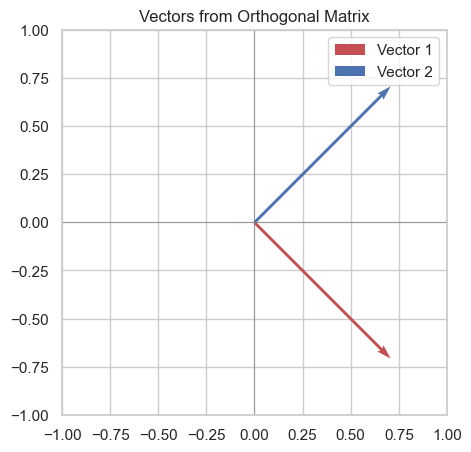

In [148]:
vector_1 = orthogonal_matrix_2[:, 0]
vector_2 = orthogonal_matrix_2[:, 1]

fig, ax = plt.subplots(figsize=(5, 5))

ax.quiver(0, 0, vector_1[0], vector_1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector 1')
ax.quiver(0, 0, vector_2[0], vector_2[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector 2')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.axhline(0, color='grey', lw=0.5)
ax.axvline(0, color='grey', lw=0.5)
ax.grid(True, which='both')
ax.legend()
ax.set_title("Vectors from Orthogonal Matrix")

plt.show()


In [463]:
np.dot(orthogonal_matrix_2[0], orthogonal_matrix_2[1])

2.2371143170757382e-17

In [464]:
np.dot([1,2], [3,4])

11

## Diagonal Matrix

In [465]:
diagonal_elements = np.array([1, 2, 3, 4])
diagonal_matrix = np.diag(diagonal_elements)

print("Diagonal Matrix:")
print(diagonal_matrix)

Diagonal Matrix:
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


## SVD Calculation

Singular Value Decomposition (SVD) is a mathematical technique used in linear algebra to decompose a matrix into 3  matrices, revealing important properties about the original matrix. It works with any matrix, not only a square matrix.

The 3 matrices are:

U - m X m orthoganal matrix

Σ - m X n diagonal matrix with non negative values in the main axis

V.t - n X n orthagonal matrix

Similar to eigendecomposition, just works on matrices which are not only square. Its a general form.

The goal is to break a matrix A into 3 matrices - u, sigma, v_transpose

In [246]:
import numpy as np

def get_rank(matrix):
    _, s, _ = np.linalg.svd(matrix)
    print(s)
    
    rank = np.sum(s > 1e-10)
    
    return rank

A = generate_random_matrix((4,5))
print("Rank of A:", get_rank(A))

B = generate_random_matrix((3,2))
print("Rank of B:", get_rank(B))

# Example 3: Zero matrix
C = np.zeros((3, 3))

print("Rank of C:", get_rank(C))

[22.75805714  7.05140404  4.35044074  1.55634237]
Rank of A: 4
[11.95764122  2.83104511]
Rank of B: 2
[0. 0. 0.]
Rank of C: 0


What do I get from SVD? for example:

1. Its rank. All non zero values in s are the matrix rank.
2. Number of dimensions needed to explain the variance.

In [227]:
def generate_random_matrix(size: tuple) -> np.array:
    rows, cols = size
    random_matrix = np.random.randint(0, 10, size=(rows, cols))
    return random_matrix

Effective dimensionality (95% variance explained): 7


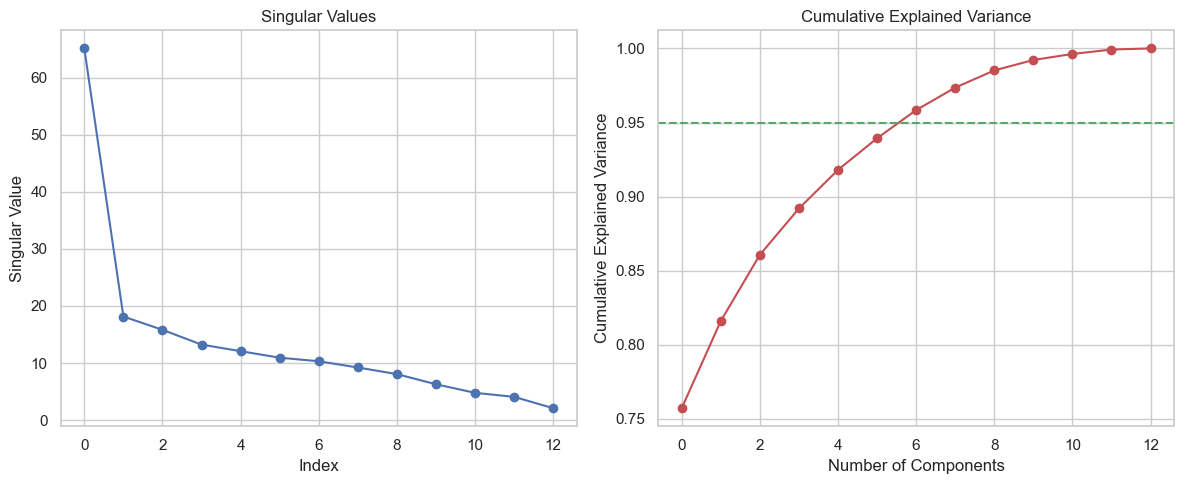

In [233]:
def analyze_dimensionality(matrix, threshold=0.95):
    U, s, _ = np.linalg.svd(matrix)
    
    cumulative_variance = np.cumsum(s**2) / np.sum(s**2)
    
    dimensionality = np.argmax(cumulative_variance >= threshold) + 1
    
    return s, cumulative_variance, dimensionality

A = generate_random_matrix((13,16))


singular_values, cumulative_variance, effective_dim = analyze_dimensionality(A)

print(f"Effective dimensionality (95% variance explained): {effective_dim}")

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(singular_values, 'bo-')
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Singular Value')

plt.subplot(122)
plt.plot(cumulative_variance, 'ro-')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

6 dimensions are enough to explain almost all the variance.

What would you choose for PCA?

SVD is more stable and less computationally expensive.

Eigendecomposition can be more stable in symmetric matrices (symmetric matrice is a matrix that is equal its transpose) 

In [247]:
symmetric_matr = np.array([
    2, 3, 6,
    3, 4, 5,
    6, 5, 9
])

In [250]:
all(symmetric_matr.transpose() == symmetric_matr)

True